___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" 
alt="CLRSWY"></p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:100%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>

<img src=https://i.ibb.co/wJW61Y2/Used-cars.jpg width="700" height="200">

<p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:200%; text-align:center; border-radius:10px 10px;">The Capstone Project of Data Analytics Module</p>

<p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:150%; text-align:center; border-radius:10px 10px;">Car Price Prediction EDA</p>


# Introduction
Welcome to "***AutoScout Data Analysis Project***". This is the capstone project of ***Data Analysis*** Module. **Auto Scout** data which using for this project, scraped from the on-line car trading company in 2019, contains many features of 9 different car models. In this project, you will have the opportunity to apply many commonly used algorithms for Data Cleaning and Exploratory Data Analysis by using many Python libraries such as Numpy, Pandas, Matplotlib, Seaborn, Scipy you will analyze clean dataset.

### Some Reminders on Exploratory data analysis (EDA)

Exploratory data analysis (EDA) is an especially important activity in the routine of a data analyst or scientist. It enables an in depth understanding of the dataset, define or discard hypotheses and create predictive models on a solid basis. It uses data manipulation techniques and several statistical tools to describe and understand the relationship between variables and how these can impact business. By means of EDA, we can obtain meaningful insights that can impact analysis under the following questions (If a checklist is good enough for pilots to use every flight, it’s good enough for data scientists to use with every dataset).
1. What question are you trying to solve (or prove wrong)?
2. What kind of data do you have?
3. What’s missing from the data?
4. Where are the outliers?
5. How can you add, change or remove features to get more out of your data?

**``Exploratory data analysis (EDA)``** is often an **iterative brainstorming process** where you pose a question, review the data, and develop further questions to investigate before beginning model development work. The image below shows how the brainstorming phase is connected with that of understanding the variables and how this in turn is connected again with the brainstorming phase.<br>

<img src=https://i.ibb.co/k0MC950/EDA-Process.png width="300" height="100">

[Image Credit: Andrew D.](https://towardsdatascience.com/exploratory-data-analysis-in-python-a-step-by-step-process-d0dfa6bf94ee)

**``In this context, the project consists of 3 parts in general:``**
* **The first part** is related to 'Data Cleaning'. It deals with Incorrect Headers, Incorrect Format, Anomalies, and Dropping useless columns.
* **The second part** is related to 'Filling Data', in other words 'Imputation'. It deals with Missing Values. Categorical to numeric transformation is done as well.
* **The third part** is related to 'Handling Outliers of Data' via Visualization libraries. So, some insights will be extracted.

**``NOTE:``**  However, you are free to create your own style. You do NOT have to stick to the steps above. We, the DA & DV instructors, recommend you study each part separately to create a source notebook for each part title for your further studies. 

In [27]:
import numpy as np
import pandas as pd
from skimpy import clean_columns

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
sns.set_style("darkgrid")

# The maximum width in characters of a column
pd.set_option('display.max_colwidth', 80)

# To display maximum columns
pd.set_option('display.max_columns', None)

# To display maximum rows
pd.set_option('display.max_rows',None)

import warnings
warnings.simplefilter(action='ignore', category=Warning)

## Reading the Data from File

In [3]:
df_=pd.read_csv('filled_scout.csv')
df=df_.copy()
df.head(3).T

,0,1,2
make_model,Audi A1,Audi A1,Audi A1
body_type,Sedans,Sedans,Sedans
price,15770,14500,14640
km,56013.0,80000.0,83450.0
prev_owner,2.0,1.0,1.0
hp,66.0,141.0,85.0
Type,Used,Used,Used
Body Color,Black,Red,Black
Paint Type,Metallic,Metallic,Metallic
Displacement,1422.0,1798.0,1598.0


In [3]:
df.shape

(15919, 32)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15919 non-null  object 
 1   body_type            15919 non-null  object 
 2   price                15919 non-null  int64  
 3   km                   15919 non-null  float64
 4   prev_owner           15919 non-null  float64
 5   hp                   15919 non-null  float64
 6   Type                 15919 non-null  object 
 7   Body Color           15919 non-null  object 
 8   Paint Type           15919 non-null  object 
 9   Displacement         15919 non-null  float64
 10  Cylinders            15919 non-null  float64
 11  Drive chain          15919 non-null  object 
 12  Fuel                 15919 non-null  object 
 13  Comfort_Convenience  15919 non-null  object 
 14  Entertainment_Media  15919 non-null  object 
 15  Extras               15919 non-null 

In [15]:
df.isnull().sum()

make_model             0
body_type              0
price                  0
km                     0
prev_owner             0
hp                     0
Type                   0
Body Color             0
Paint Type             0
Displacement           0
Cylinders              0
Drive chain            0
Fuel                   0
Comfort_Convenience    0
Entertainment_Media    0
Extras                 0
Gears                  0
age                    0
Inspection_new         0
Upholstery_Type        0
Upholstery_color       0
nr_of_doors            0
nr_of_seats            0
Gearing_Type           0
weight                 0
cons_comb              0
CO2_Emission           0
dtype: int64

## Columns with missing values

In [5]:
miss_columns=[column for column in df if any(df[column].isnull())]

In [16]:
df.isnull().sum()

make_model             0
body_type              0
price                  0
km                     0
prev_owner             0
hp                     0
Type                   0
Body Color             0
Paint Type             0
Displacement           0
Cylinders              0
Drive chain            0
Fuel                   0
Comfort_Convenience    0
Entertainment_Media    0
Extras                 0
Gears                  0
age                    0
Inspection_new         0
Upholstery_Type        0
Upholstery_color       0
nr_of_doors            0
nr_of_seats            0
Gearing_Type           0
weight                 0
cons_comb              0
CO2_Emission           0
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,15919.0,18019.896727,7386.169409,13.0,12850.0,16900.0,21900.0,74600.0
km,15919.0,31971.902186,37072.424904,0.0,2000.0,20413.0,46914.0,317000.0
prev_owner,15919.0,1.049124,0.328676,0.0,1.0,1.0,1.0,4.0
hp,15919.0,88.344808,26.763703,1.0,66.0,85.0,101.0,294.0
Displacement,15919.0,1425.609335,329.720022,1.0,1229.0,1461.0,1598.0,16000.0
Cylinders,15919.0,3.790125,0.419541,1.0,4.0,4.0,4.0,8.0
Gears,15919.0,5.939820,0.791983,1.0,5.0,6.0,6.0,50.0
age,15919.0,1.394623,1.122170,0.0,0.0,1.0,2.0,3.0
Upholstery_color,15919.0,0.013003,0.113292,0.0,0.0,0.0,0.0,1.0
nr_of_doors,15919.0,4.660657,0.642198,1.0,4.0,5.0,5.0,7.0


# PART- 3 `( Handling With Outliers )`

In [10]:
def null_check (col) :
    print("Column name :", col)
    print("--"*20)
    print("Number of nulls :", df[col].isnull().sum())
    print("Percent of nulls :", '%', round((df[col].isnull().sum()/df.shape[0])*100, 2))
    print("Value_counts :", "\n", df[col].value_counts(dropna=False),sep="")

In [11]:
def groupwith2(df, group_col1, group_col2, col_name):
    for group1 in list(df[group_col1].unique()):
        for group2 in list(df[group_col2].unique()):
            cond1 = df[group_col1]==group1
            cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
            mode1 = list(df[cond1][col_name].mode())
            mode2 = list(df[cond2][col_name].mode())
            if mode2 != []:
                df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond2][col_name].mode()[0])
            elif mode1 != []:
                df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond1][col_name].mode()[0])
            else:
                df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[col_name].mode()[0])

In [12]:
def fill_w_mean(df,group_col1,group_col2,col_name):
    df[col_name].fillna(df.groupby([group_col1, group_col2])[col_name].transform("mean"), inplace = True)
    df[col_name].fillna(df.groupby(group_col1)[col_name].transform("mean"), inplace = True)
    df[col_name].fillna(df[col_name].mean(), inplace = True)
    
def fill_w_median(df,group_col1,group_col2,col_name):        
    df[col_name].fillna(df.groupby([group_col1, group_col2])[col_name].transform("median"), inplace = True)
    df[col_name].fillna(df.groupby(group_col1)[col_name].transform("median"), inplace = True)
    df[col_name].fillna(df[col_name].median(), inplace = True)

## 1- Price

In [17]:
null_check("price")

Column name : price
----------------------------------------
Number of nulls : 0
Percent of nulls : % 0.0
Value_counts :
14990    154
15990    151
10990    139
15900    106
17990    102
9900      98
20900     93
22900     92
13990     92
21900     91
19900     89
14900     88
17900     86
18900     86
16990     86
16900     84
18990     81
8490      78
12990     77
21500     75
19990     73
7900      70
9990      70
18490     70
13500     69
13900     68
8990      67
9999      67
16500     65
8500      65
20500     64
18500     61
9500      61
15500     61
15450     60
12900     60
8900      60
14490     59
14950     59
24900     59
15490     59
20990     58
10900     58
17500     57
15980     54
22500     54
15950     52
11990     51
21490     51
10450     50
23900     50
15850     50
22990     49
23500     49
12500     49
9800      47
7950      46
10500     44
10950     43
17950     42
25490     42
19500     42
18950     41
13950     41
16490     40
7800      39
26990     39
10490   

<AxesSubplot:xlabel='price'>

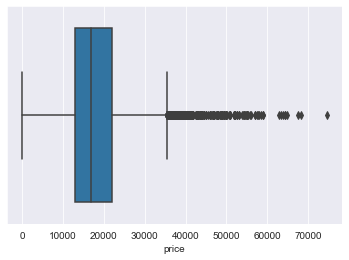

In [28]:
sns.boxplot(df.price)

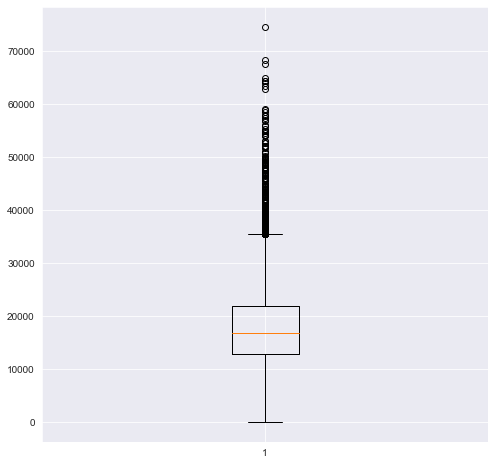

In [29]:
plt.figure(figsize=(8, 8))
plt.boxplot(df.price);

In [52]:
df.price.sort_values().head(20)

8594       13
8828      120
6066      255
8829      331
8827     4950
8825     4990
8826     5250
8824     5300
13770    5445
8823     5450
8822     5490
8820     5499
3235     5555
8821     5600
13763    5700
13762    5800
13760    5850
13759    5890
8818     5890
13761    5900
Name: price, dtype: int64

In [53]:
df.price.sort_values().tail(20)

15811    55285
15810    55800
3597     56100
3592     56900
15392    56950
3596     57400
15809    57800
15807    57990
3593     58500
15808    58950
3594     58990
3590     62900
15833    63477
3595     63900
15831    64298
15828    64332
3587     64900
3649     67600
15826    68320
3648     74600
Name: price, dtype: int64

In [54]:
df.price.loc[df.price < 1000].index


Int64Index([6066, 8594, 8828, 8829], dtype='int64')

In [55]:
df.drop(index=df.price.loc[df.price < 1000].index,axis=0, inplace=True)

In [56]:
df.shape

(15915, 27)

In [57]:
df.reset_index(drop=True, inplace=True)

In [215]:
# method for filling null values with grouping
def groupby1_mode(df, group_colmn, our_colmn):
    for group in df[group_colmn].unique():
        cond = df[group_colmn] == group
        if df.loc[cond ,our_colmn].mode()[0] != [] :
            df.loc[cond, our_colmn]=df.loc[cond, our_colmn].fillna(df.loc[cond ,our_colmn].mode()[0])
        else:
            df.loc[cond, our_colmn]=df.loc[cond, our_colmn].fillna(df[our_colmn].mode()[0])

In [218]:
# method for filling null values with grouping
def groupby2_mode(df, group_colmn, our_colmn):
    for group in df[group_colmn].unique():
        cond = df[group_colmn] == group
        df.loc[cond, our_colmn]=df.loc[cond, our_colmn].fillna(df.loc[cond ,our_colmn].mode()[0])

In [328]:
def fill_w_mean(df,group_col1,group_col2,col_name):
    df[col_name].fillna(df.groupby([group_col1, group_col2])[col_name].transform("mean"), inplace = True)
    df[col_name].fillna(df.groupby(group_col1)[col_name].transform("mean"), inplace = True)
    df[col_name].fillna(df[col_name].mean(), inplace = True)
    
def fill_w_median(df,group_col1,group_col2,col_name):        
    df[col_name].fillna(df.groupby([group_col1, group_col2])[col_name].transform("median"), inplace = True)
    df[col_name].fillna(df.groupby(group_col1)[col_name].transform("median"), inplace = True)
    df[col_name].fillna(df[col_name].median(), inplace = True)

In [306]:
def ffill_groupby2(df,group_col1,group_col2,col_name)  :         
    for group1 in list(df[group_col1].unique()):
        for group2 in list(df[group_col2].unique()):
            cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
            df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(method="ffill").fillna(method="bfill")
                
    for group1 in list(df[group_col1].unique()):
        cond1 = df[group_col1]==group1
        df.loc[cond1, col_name] = df.loc[cond1, col_name].fillna(method="ffill").fillna(method="bfill")            
           
    df[col_name] = df[col_name].fillna(method="ffill").fillna(method="bfill")

In [191]:
groupby1_mode(df,"make_model","body_type")

In [192]:
null_check("body_type")

Column name : body_type
----------------------------------------
Number of nulls : 0
Percent of nulls : % 0.0
Value_counts :
Sedans           8005
Station wagon    3678
Compact          3242
Van               817
Transporter        88
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64


## 2- km

In [30]:
null_check("km")

Column name : km
----------------------------------------
Number of nulls : 0
Percent of nulls : % 0.0
Value_counts :
10.000000        1045
16.987484         848
1.000000          367
5.000000          170
50.000000         148
100.000000        139
15.000000         109
5000.000000       104
100.648820         91
20.000000          61
3000.000000        58
12.000000          56
8000.000000        49
45000.000000       48
10000.000000       47
25000.000000       47
30000.000000       47
18000.000000       46
1000.000000        46
19000.000000       44
35000.000000       44
150.000000         43
15000.000000       43
70000.000000       43
6000.000000        41
40000.000000       40
20000.000000       40
7.000000           38
9000.000000        38
80000.000000       37
50000.000000       36
11.000000          35
500.000000         35
17000.000000       34
55000.000000       34
16000.000000       34
3373.867550        33
3.000000           33
11000.000000       33
28000.000000       32
60

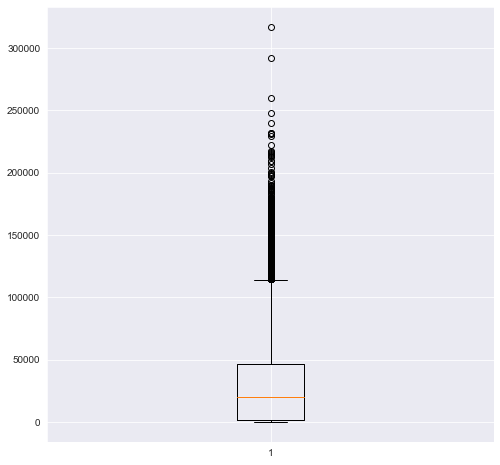

In [36]:
plt.figure(figsize=(8, 8))
plt.boxplot(df.km)
plt.show()

## 3- prev_owner

In [37]:
null_check("prev_owner")

Column name : prev_owner
----------------------------------------
Number of nulls : 0
Percent of nulls : % 0.0
Value_counts :
1.0    14264
2.0     1171
0.0      453
3.0       29
4.0        2
Name: prev_owner, dtype: int64


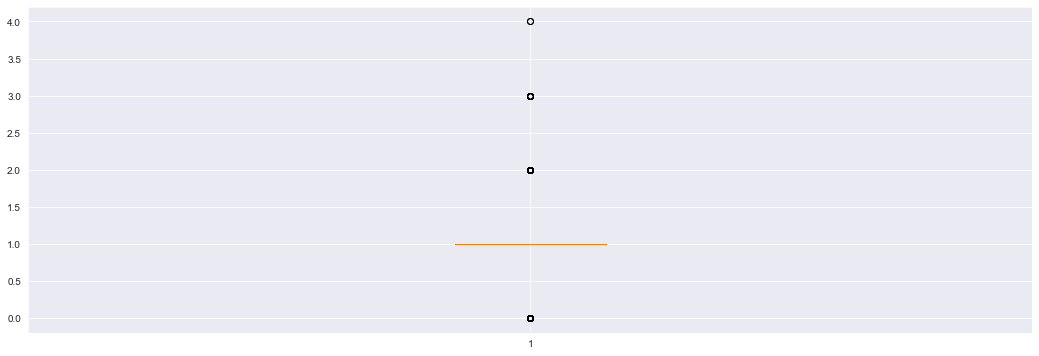

In [38]:
plt.figure(figsize=(18, 6))
plt.boxplot(df.prev_owner)
plt.show()

## 8- nr_of_doors

In [129]:
null_check("nr_of_doors")

Column name : nr_of_doors
----------------------------------------
Number of nulls : 0
Percent of nulls : % 0.0
Value_counts :
5.0    11784
4.0     3079
3.0      831
2.0      219
1.0        1
7.0        1
Name: nr_of_doors, dtype: int64


In [130]:
df[df.nr_of_doors==1]

,make_model,body_type,price,km,prev_owner,hp,Type,Body Color,Paint Type,Displacement,Cylinders,Drive chain,Fuel,Comfort_Convenience,Entertainment_Media,Extras,Gears,age,Inspection_new,Upholstery_Type,Upholstery_color,nr_of_doors,nr_of_seats,Gearing_Type,weight,cons_comb,CO2_Emission
13778,Renault Clio,Compact,8500,41493.0,1.0,55.0,Used,White,Metallic,1461.0,4.0,front,Diesel,"Air conditioning,Cruise control,Hill Holder,Multi-function steering wheel,Po...","Bluetooth,Hands-free equipment,On-board computer,Radio,USB",Alloy wheels,5.0,3.0,No,Cloth,0.0,1.0,5.0,Manual,1087.0,5.0,85.0


In [131]:
df.groupby(["make_model","body_type"]).nr_of_doors.value_counts(dropna=False)

make_model      body_type      nr_of_doors
Audi A1         Compact        5.0             683
                               4.0             207
                               3.0              80
                               2.0              69
                Coupe          2.0               1
                               5.0               1
                Sedans         5.0            1066
                               4.0             326
                               3.0             130
                               2.0              29
                Station wagon  5.0              17
                               4.0               3
                               3.0               1
                Van            5.0               1
Audi A2         Off-Road       5.0               1
Audi A3         Compact        5.0             165
                               3.0              11
                               4.0               6
                Convertible    2.0     

In [408]:
df.groupby(["make_model","body_type","nr_of_doors"]).price.describe().head(50)

count          mean           std  \
make_model body_type     nr_of_doors                                       
Audi A1    Compact       2.0            69.0  15201.608696   2121.071304   
                         3.0            80.0  15190.012500   2353.692184   
                         4.0           207.0  19018.077295   4481.634702   
                         5.0           666.0  20055.171171   4463.177340   
           Coupe         2.0             1.0  13950.000000           NaN   
                         5.0             1.0  15900.000000           NaN   
           Sedans        2.0            29.0  15110.827586   1886.382140   
                         3.0           130.0  15369.500000   2553.093728   
                         4.0           326.0  19210.806748   4336.605209   
                         5.0          1056.0  18994.381629   4526.894609   
           Station wagon 3.0             1.0  16500.000000           NaN   
                         4.0             3.0  15430.333333   1284.730452   
                         5.0            17.0  18308.705882   4704.152511   
           Van           5.0             1.0  29000.000000           NaN   
Audi A2    Off-Road      5.0             1.0  28200.000000           NaN   
Audi A3    Compact       3.0            11.0  18346.727273   2744.114032   
                         4.0             6.0  19426.166667   3987.203953   
                         5.0           164.0  19079.835366   7097.992615   
           Convertible   2.0             7.0  28906.142857  14210.760505   
                         5.0             1.0  20900.000000           NaN   
           Coupe         3.0             4.0  17745.000000    962.652585   
           Sedans        2.0            19.0  15994.421053   2616.207334   
                         3.0            97.0  18455.247423   2433.973453   
                         4.0           518.0  20413.982625   4667.898066   
                         5.0          1963.0  21569.222109   4882.447663   
           Station wagon 2.0             1.0  15950.000000           NaN   
                         3.0             1.0  17990.000000           NaN   
                         4.0           110.0  19633.645455   4196.012720   
                         5.0           169.0  21428.680473   4870.577966   
Opel Astra Compact       4.0             5.0   9849.800000   2055.401469   
                         5.0           180.0  16376.150000   6041.218803   
           Coupe         3.0             1.0  14490.000000           NaN   
                         5.0             1.0  29990.000000           NaN   
           Off-Road      5.0             1.0  18590.000000           NaN   
           Sedans        3.0             3.0  12526.666667   2060.129446   
                         4.0           241.0  15251.112033   3481.481601   
                         5.0           797.0  16233.474279   4627.793960   
           Station wagon 4.0           287.0  14674.104530   4921.442990   
                         5.0           986.0  15972.393509   5226.198720   
Opel Corsa Compact       2.0            89.0   9372.910112   2068.924774   
                         3.0           342.0  10624.570175   2440.962299   
                         4.0           270.0  12054.511111   2947.019406   
                         5.0           608.0  12399.092105   3225.587544   
           Coupe         3.0            12.0   8587.500000   1495.162655   
                         5.0             1.0  10990.000000           NaN   
           Off-Road      5.0             3.0   8166.666667    461.880215   
           Sedans        2.0             4.0   8780.000000   1448.608528   
                         3.0           146.0   9241.123288   2363.020133   
                         4.0            21.0  12589.238095   2950.822765   
                         5.0           662.0  10457.043807   2623.598099   

                                          min       25%      50%       75%  \
make_mod

In [135]:
df.nr_of_doors.sort_values().tail(20)

6153     5.0
6154     5.0
6155     5.0
6156     5.0
6157     5.0
6159     5.0
15914    5.0
6162     5.0
6163     5.0
6165     5.0
6166     5.0
6167     5.0
6168     5.0
6169     5.0
6170     5.0
6171     5.0
6172     5.0
6173     5.0
6175     5.0
15198    7.0
Name: nr_of_doors, dtype: float64

In [136]:
df.nr_of_doors.sort_values().head(20)

13778    1.0
9815     2.0
8445     2.0
1422     2.0
9508     2.0
3597     2.0
764      2.0
9511     2.0
221      2.0
8822     2.0
1060     2.0
8333     2.0
3575     2.0
8814     2.0
234      2.0
8614     2.0
1319     2.0
3560     2.0
8802     2.0
8997     2.0
Name: nr_of_doors, dtype: float64

In [411]:
df.nr_of_doors.value_counts(dropna=False)

5.0    11787
4.0     3079
3.0      832
2.0      219
1.0        1
7.0        1
Name: nr_of_doors, dtype: int64

## 9- nr_of_seats

In [137]:
null_check("nr_of_seats")

Column name : nr_of_seats
----------------------------------------
Number of nulls : 0
Percent of nulls : % 0.0
Value_counts :
5.0    14304
4.0     1127
7.0      362
2.0      119
6.0        2
3.0        1
Name: nr_of_seats, dtype: int64


In [138]:
df.groupby(["make_model","body_type"]).nr_of_seats.value_counts(dropna=False)

make_model      body_type      nr_of_seats
Audi A1         Compact        5.0             606
                               4.0             431
                               3.0               1
                               6.0               1
                Coupe          4.0               1
                               5.0               1
                Sedans         5.0             909
                               4.0             642
                Station wagon  5.0              15
                               4.0               6
                Van            5.0               1
Audi A2         Off-Road       5.0               1
Audi A3         Compact        5.0             182
                Convertible    4.0               6
                               5.0               2
                Coupe          5.0               4
                Sedans         5.0            2601
                               4.0              20
                Station wagon  5.0     

In [139]:
df.groupby(["make_model","body_type","nr_of_seats"]).price.describe().head(50)

count          mean           std  \
make_model    body_type     nr_of_seats                                       
Audi A1       Compact       3.0             1.0  23090.000000           NaN   
                            4.0           431.0  17295.649652   3633.456212   
                            5.0           606.0  20539.181518   4667.666146   
                            6.0             1.0  13500.000000           NaN   
              Coupe         4.0             1.0  13950.000000           NaN   
                            5.0             1.0  15900.000000           NaN   
              Sedans        4.0           642.0  16965.867601   3521.931826   
                            5.0           909.0  19856.503850   4654.885422   
              Station wagon 4.0             6.0  16035.000000   2218.096030   
                            5.0            15.0  18521.933333   4849.095725   
              Van           5.0             1.0  29000.000000           NaN   
Audi A2       Off-Road      5.0             1.0  28200.000000           NaN   
Audi A3       Compact       5.0           182.0  19024.472527   6808.256065   
              Convertible   4.0             6.0  24373.833333   8353.651188   
                            5.0             2.0  38500.000000  24890.158698   
              Coupe         5.0             4.0  17745.000000    962.652585   
              Sedans        4.0            20.0  21020.500000   1670.582864   
                            5.0          2601.0  21152.127643   4844.282222   
              Station wagon 5.0           282.0  20684.354610   4680.918592   
Opel Astra    Compact       5.0           185.0  16199.762162   6059.914256   
              Coupe         4.0             2.0  22240.000000  10960.155108   
              Off-Road      5.0             1.0  18590.000000           NaN   
              Sedans        5.0          1053.0  15963.178538   4398.680098   
              Station wagon 4.0             4.0   9187.500000   1162.163930   
                            5.0          1280.0  15696.955469   5164.453048   
Opel Corsa    Compact       4.0             5.0  12303.800000   1982.506545   
                            5.0          1312.0  11671.940549   3039.235140   
              Coupe         2.0             1.0   7200.000000           NaN   
                            5.0            12.0   8903.333333   1573.660084   
              Off-Road      5.0             3.0   8166.666667    461.880215   
              Sedans        4.0             1.0   8200.000000           NaN   
                            5.0           873.0  10219.754868   2613.436754   
              Transporter   2.0             4.0   5937.500000   1018.475167   
                            4.0             1.0   9700.000000           NaN   
                            5.0             2.0  10050.000000    636.396103   
              Van           5.0             2.0   7900.000000      0.000000   
Opel Insignia Compact       5.0            27.0  28590.074074  11287.713923   
              Coupe         5.0             1.0  17094.000000           NaN   
              Off-Road      5.0             7.0  29451.285714   7618.618241   
              Sedans        5.0           900.0  21263.470000   7408.317757   
              Station wagon 2.0             1.0   9500.000000           NaN   
                            4.0             2.0  27135.000000  18165.573209   
                            5.0          1659.0  21425.551537   7727.035228   
              Van           5.0             1.0  20980.000000           NaN   
Renault Clio  Compact       2.0             8.0   9491.375000   1435.780319   
                            5.0           476.0  12702.714286   4104.018437   
              Coupe         5.0             1.0  17990.000000           NaN   
              Off-Road      5.0             2.0  12845.000000   7276.128778   
              Sedans        2.0            75.0   8443.853333   1780.223442   
             

In [144]:
df.nr_of_seats.loc[df.nr_of_seats.isin([3,6])]=np.nan

In [145]:
groupwith2(df,"make_model","body_type","nr_of_seats")

In [146]:
null_check("nr_of_seats")

Column name : nr_of_seats
----------------------------------------
Number of nulls : 0
Percent of nulls : % 0.0
Value_counts :
5.0    14307
4.0     1127
7.0      362
2.0      119
Name: nr_of_seats, dtype: int64


## 5- Displacement

In [66]:
null_check("Displacement")

Column name : Displacement
----------------------------------------
Number of nulls : 0
Percent of nulls : % 0.0
Value_counts :
1598.0     5043
999.0      2465
1398.0     1386
1399.0      768
1229.0      678
1956.0      670
1461.0      667
1490.0      559
1422.0      467
1197.0      372
898.0       351
1395.0      320
1968.0      301
1149.0      288
1618.0      212
1798.0      210
1498.0      196
1600.0      130
1248.0      110
1997.0      103
1364.0      102
1400.0       90
998.0        72
1500.0       50
2000.0       46
1000.0       40
1.0          36
1998.0       25
2480.0       20
1200.0       18
1984.0       18
1397.0       11
899.0        11
160.0         6
929.0         5
1499.0        5
997.0         4
1596.0        4
139.0         4
900.0         4
1599.0        3
1199.0        3
1396.0        3
1495.0        2
1589.0        2
1300.0        2
2.0           2
995.0         2
1496.0        1
890.0         1
1580.0        1
1995.0        1
1333.0        1
54.0          1
1533.0  

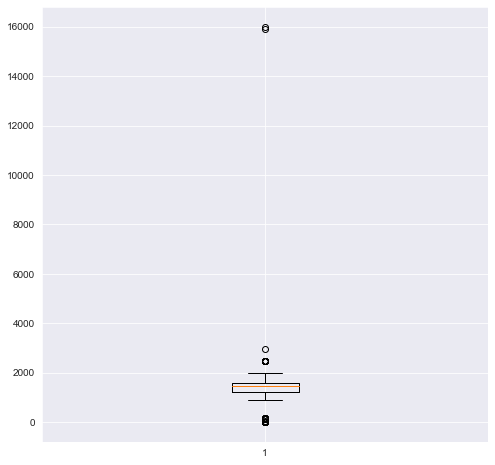

In [71]:
plt.figure(figsize=(8, 8))
plt.boxplot(df.Displacement)
plt.show()

In [69]:
df.Displacement.sort_values().head(60)

12746      1.0
12831      1.0
14311      1.0
12463      1.0
12469      1.0
12819      1.0
12480      1.0
12495      1.0
14322      1.0
14323      1.0
12666      1.0
12811      1.0
14310      1.0
12796      1.0
12794      1.0
14318      1.0
12600      1.0
12782      1.0
12497      1.0
14321      1.0
12550      1.0
14320      1.0
12792      1.0
14315      1.0
12779      1.0
12786      1.0
12844      1.0
12777      1.0
12845      1.0
14280      1.0
12765      1.0
13900      1.0
12764      1.0
14324      1.0
14316      1.0
14317      1.0
10555      2.0
14194      2.0
13908     54.0
10190    122.0
7810     139.0
7811     139.0
7809     139.0
7808     139.0
8127     140.0
15573    160.0
15570    160.0
15575    160.0
15571    160.0
15572    160.0
15574    160.0
13649    890.0
14718    898.0
14500    898.0
14717    898.0
14716    898.0
14720    898.0
14721    898.0
14722    898.0
14694    898.0
Name: Displacement, dtype: float64

In [73]:
df.Displacement.loc[df.Displacement < 800] = np.nan

In [95]:
df.Displacement.sort_values().tail(30)

12514    2000.0
12499    2000.0
11028    2000.0
13025    2000.0
12516    2000.0
13023    2000.0
11866    2000.0
12517    2000.0
12490    2000.0
3592     2480.0
3593     2480.0
3587     2480.0
3595     2480.0
3648     2480.0
3649     2480.0
3590     2480.0
3598     2480.0
3610     2480.0
3609     2480.0
3608     2480.0
3599     2480.0
3600     2480.0
3601     2480.0
3606     2480.0
3605     2480.0
3604     2480.0
3603     2480.0
3602     2480.0
3596     2480.0
10767    2967.0
Name: Displacement, dtype: float64

In [93]:
null_check("Displacement")

Column name : Displacement
----------------------------------------
Number of nulls : 0
Percent of nulls : % 0.0
Value_counts :
1598.0    5076
999.0     2465
1398.0    1387
1399.0     772
1461.0     682
1229.0     678
1956.0     670
1490.0     559
1422.0     467
1197.0     372
898.0      351
1395.0     320
1968.0     301
1149.0     288
1618.0     212
1798.0     210
1498.0     196
1600.0     130
1248.0     110
1997.0     103
1364.0     102
1400.0      90
998.0       72
1500.0      50
2000.0      46
1000.0      40
1998.0      25
2480.0      20
1984.0      18
1200.0      18
1397.0      11
899.0       11
929.0        5
1499.0       5
997.0        4
900.0        4
1596.0       4
1599.0       3
1396.0       3
1199.0       3
1589.0       2
1300.0       2
1495.0       2
995.0        2
890.0        1
1333.0       1
1580.0       1
1995.0       1
1533.0       1
1100.0       1
1198.0       1
1496.0       1
1368.0       1
1896.0       1
1584.0       1
1568.0       1
996.0        1
1696.0       1
16

In [82]:
df.Displacement.loc[df.Displacement > 10000]=np.nan

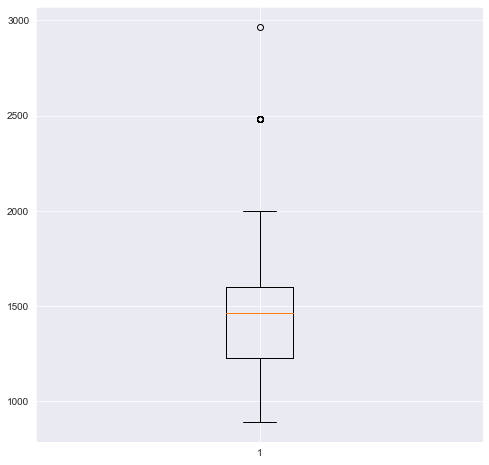

In [94]:
plt.figure(figsize=(8, 8))
plt.boxplot(df.Displacement)
plt.show()

## 6- Cylinders

In [96]:
null_check("Cylinders")

Column name : Cylinders
----------------------------------------
Number of nulls : 0
Percent of nulls : % 0.0
Value_counts :
4.0    12508
3.0     3372
5.0       23
8.0        4
6.0        3
2.0        3
1.0        2
Name: Cylinders, dtype: int64


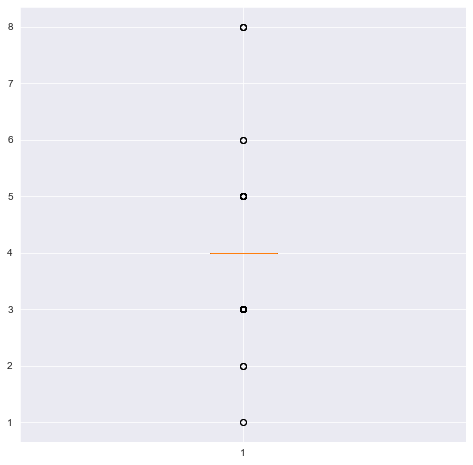

In [97]:
plt.figure(figsize=(8, 8))
plt.boxplot(df.Cylinders);

In [98]:
df.groupby(["make_model", "body_type"]).Cylinders.value_counts(dropna=False)

make_model      body_type      Cylinders
Audi A1         Compact        3.0           821
                               4.0           216
                               8.0             2
                Coupe          3.0             2
                Sedans         3.0          1203
                               4.0           348
                Station wagon  3.0            11
                               4.0            10
                Van            3.0             1
Audi A2         Off-Road       3.0             1
Audi A3         Compact        4.0           162
                               3.0            19
                               5.0             1
                Convertible    4.0             8
                Coupe          4.0             3
                               3.0             1
                Sedans         4.0          2197
                               3.0           405
                               5.0            19
                Station wago

## 7- Gears

In [102]:
null_check("Gears")

Column name : Gears
----------------------------------------
Number of nulls : 0
Percent of nulls : % 0.0
Value_counts :
6.0     8614
5.0     4253
7.0     2810
8.0      224
9.0        6
1.0        2
3.0        2
4.0        2
2.0        1
50.0       1
Name: Gears, dtype: int64


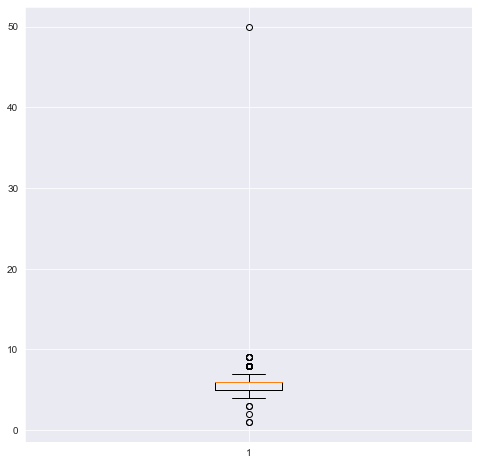

In [103]:
plt.figure(figsize=(8, 8))
plt.boxplot(df.Gears);

In [110]:
df.groupby("make_model")["Gears"].value_counts()

make_model      Gears
Audi A1         5.0      1254
                7.0      1172
                6.0       186
                8.0         2
Audi A2         6.0         1
Audi A3         6.0      1598
                7.0      1497
                5.0         2
Opel Astra      6.0      2133
                5.0       391
                7.0         1
Opel Corsa      5.0      1426
                6.0       787
                1.0         1
                2.0         1
                8.0         1
Opel Insignia   6.0      2368
                8.0       221
                5.0         7
                7.0         2
Renault Clio    5.0      1171
                6.0       663
                7.0         3
                1.0         1
                50.0        1
Renault Duster  6.0        34
Renault Espace  6.0       844
                7.0       135
                9.0         6
                3.0         2
                4.0         2
                5.0         2
Name: Gears, dtype

In [111]:
df[df.Gears.isin([1,2,3,4])]

,make_model,body_type,price,km,prev_owner,hp,Type,Body Color,Paint Type,Displacement,Cylinders,Drive chain,Fuel,Comfort_Convenience,Entertainment_Media,Extras,Gears,age,Inspection_new,Upholstery_Type,Upholstery_color,nr_of_doors,nr_of_seats,Gearing_Type,weight,cons_comb,CO2_Emission
8917,Opel Corsa,Compact,11000,24000.0,1.0,66.0,Used,Blue,Metallic,1398.0,4.0,front,Benzine,"Air conditioning,Light sensor,Multi-function steering wheel,Navigation syste...","Bluetooth,On-board computer,Radio,USB","Alloy wheels,Touch screen",1.0,1.0,No,Cloth,0.0,5.0,5.0,Semi-automatic,1163.0,4.8,112.0
9808,Opel Corsa,Sedans,9880,19247.0,1.0,51.0,Used,Grey,Metallic,1229.0,4.0,front,Benzine,"Air conditioning,Light sensor,Navigation system,Power windows,Rain sensor","Bluetooth,On-board computer",Alloy wheels,2.0,1.0,No,Cloth,0.0,5.0,5.0,Manual,1163.0,5.3,124.0
14371,Renault Clio,Compact,23990,10.0,1.0,147.0,Demonstration,White,Metallic,1618.0,4.0,front,Benzine,"Air conditioning,Automatic climate control,Cruise control,Multi-function ste...","Bluetooth,Hands-free equipment,On-board computer","Alloy wheels,Sport package,Sport seats,Sport suspension",1.0,1.0,No,Cloth,0.0,4.0,5.0,Automatic,1288.0,5.0,120.0
15813,Renault Espace,Van,54204,11.0,1.0,146.0,New,White,Metallic,1997.0,4.0,front,Diesel,"Air conditioning,Armrest,Automatic climate control,Cruise control,Electrical...","Digital radio,Radio","Alloy wheels,Voice Control",3.0,0.0,No,Part leather,0.0,5.0,5.0,Automatic,1779.0,5.4,120.0
15818,Renault Espace,Van,50950,11.0,1.0,165.0,New,Grey,Metallic,1798.0,4.0,front,Benzine,"Air conditioning,Armrest,Automatic climate control,Cruise control,Electrical...","Digital radio,Radio","Alloy wheels,Voice Control",4.0,0.0,No,Cloth,0.0,5.0,5.0,Automatic,1647.0,7.6,153.0
15819,Renault Espace,Van,50950,11.0,1.0,165.0,New,Grey,Metallic,1798.0,4.0,front,Benzine,"Air conditioning,Armrest,Automatic climate control,Cruise control,Electrical...","Digital radio,Radio","Alloy wheels,Voice Control",4.0,0.0,No,Cloth,0.0,5.0,5.0,Automatic,1647.0,7.6,153.0
15841,Renault Espace,Van,46660,11.0,1.0,118.0,New,White,Metallic,1997.0,4.0,front,Diesel,"Air conditioning,Armrest,Automatic climate control,Cruise control,Electrical...","Digital radio,Radio","Alloy wheels,Voice Control",3.0,0.0,No,Part leather,0.0,5.0,5.0,Automatic,1733.0,5.1,120.0


In [117]:
df[df.Gears.isin([8,9,50])]

,make_model,body_type,price,km,prev_owner,hp,Type,Body Color,Paint Type,Displacement,Cylinders,Drive chain,Fuel,Comfort_Convenience,Entertainment_Media,Extras,Gears,age,Inspection_new,Upholstery_Type,Upholstery_color,nr_of_doors,nr_of_seats,Gearing_Type,weight,cons_comb,CO2_Emission
215,Audi A1,Compact,16880,6680.000000,1.0,70.0,Used,Blue,Metallic,999.0,3.0,front,Benzine,"Air conditioning,Armrest,Automatic climate control,Electrical side mirrors,L...","Bluetooth,CD player,Hands-free equipment,MP3,On-board computer,Radio","Alloy wheels,Catalytic Converter,Voice Control",8.0,2.0,Yes,Cloth,0.0,5.0,4.0,Automatic,1180.0,4.40,104.0
1033,Audi A1,Sedans,20500,3000.000000,1.0,60.0,Employee's car,Grey,Metallic,999.0,4.0,front,Benzine,"Air conditioning,Armrest,Automatic climate control,Cruise control,Electrical...","Bluetooth,CD player,Digital radio,Hands-free equipment,MP3,On-board computer...","Alloy wheels,Catalytic Converter,Voice Control,Winter tyres",8.0,1.0,No,Cloth,0.0,5.0,5.0,Automatic,1650.0,4.90,129.0
10147,Opel Corsa,Compact,14770,5.000000,1.0,66.0,New,Grey,Metallic,1398.0,4.0,front,Benzine,"Air conditioning,Cruise control,Electrically heated windshield,Electrical si...","Bluetooth,Hands-free equipment,On-board computer,Radio,USB","Alloy wheels,Touch screen",8.0,0.0,No,Cloth,0.0,4.0,5.0,Automatic,1163.0,5.90,136.0
10479,Opel Insignia,Station wagon,18400,44000.000000,1.0,125.0,Used,Grey,Metallic,1956.0,4.0,front,Diesel,"Air conditioning,Armrest,Automatic climate control,Cruise control,Electrical...","Bluetooth,CD player,Hands-free equipment,MP3,On-board computer,Radio,USB","Alloy wheels,Roof rack,Touch screen,Trailer hitch,Voice Control",8.0,3.0,No,Full leather,0.0,5.0,5.0,Automatic,1660.0,5.70,150.0
10546,Opel Insignia,Station wagon,17700,64000.000000,1.0,125.0,Used,Silver,Metallic,1956.0,4.0,front,Diesel,"Air conditioning,Armrest,Automatic climate control,Cruise control,Electrical...","Bluetooth,CD player,Hands-free equipment,On-board computer,USB","Alloy wheels,Roof rack,Touch screen,Trailer hitch,Voice Control,Winter tyres",8.0,2.0,No,Cloth,0.0,5.0,5.0,Automatic,1666.0,5.70,150.0
11238,Opel Insignia,Station wagon,20500,25494.000000,1.0,125.0,Used,Grey,Metallic,1956.0,4.0,front,Diesel,"Air conditioning,Automatic climate control,Cruise control,Electrically adjus...","On-board computer,Sound system","Alloy wheels,Roof rack",8.0,2.0,No,Cloth,0.0,5.0,5.0,Automatic,1487.0,5.15,150.0
11246,Opel Insignia,Sedans,21940,24620.000000,1.0,125.0,Used,Grey,Metallic,1956.0,4.0,front,Diesel,"Air conditioning,Armrest,Automatic climate control,Cruise control,Electrical...","Bluetooth,Hands-free equipment,On-board computer,Radio,Sound system,USB","Alloy wheels,Touch screen,Voice Control",8.0,1.0,Yes,Part leather,0.0,4.0,5.0,Automatic,1503.0,5.50,145.0
11300,Opel Insignia,Station wagon,21980,20541.000000,1.0,125.0,Used,Silver,Metallic,1956.0,4.0,front,Diesel,"Air conditioning,Armrest,Automatic climate control,Cruise control,Electrical...","Bluetooth,Hands-free equipment,On-board computer,Radio,USB","Roof rack,Sport seats,Touch screen,Voice Control",8.0,1.0,No,Part leather,0.0,4.0,5.0,Automatic,1487.0,5.70,150.0
11301,Opel Insignia,Station wagon,21980,19212.000000,1.0,125.0,Used,Silver,Metallic,1956.0,4.0,front,Diesel,"Air conditioning,Armrest,Automatic climate control,Cruise control,Electrical...","Bluetooth,Hands-free equipment,On-board computer,Radio,USB","Roof rack,Sport seats,Touch screen,Voice Control",8.0,1.0,No,Part leather,0.0,4.0,5.0,Automatic,1487.0,5.70,150.0
11305,Opel Insignia,Station wagon,21980,28121.000000,1.0,125.0,Used,Grey,Metallic,1956.0,4.0,front,Diesel,"Air conditioning,Armrest,Automatic climate control,Cruise control,Electrical...","Bluetooth,Hands-free equipment,On-board computer,Radio,USB","Touch screen,Voice Control",8.0,1.0,No,Part leather,0.0,4.0,5.0,Automatic,1487.0,5.70,150.0


In [105]:
df.Gears.sort_values().head(40)

14371    1.0
8917     1.0
9808     2.0
15813    3.0
15841    3.0
15818    4.0
15819    4.0
9393     5.0
9392     5.0
8681     5.0
9390     5.0
9389     5.0
9388     5.0
9387     5.0
9386     5.0
9394     5.0
9391     5.0
9395     5.0
9396     5.0
9409     5.0
9408     5.0
9407     5.0
9406     5.0
9405     5.0
9404     5.0
9385     5.0
9403     5.0
9402     5.0
9401     5.0
9400     5.0
9399     5.0
9398     5.0
9397     5.0
14057    5.0
9384     5.0
9382     5.0
9410     5.0
14109    5.0
14108    5.0
14107    5.0
Name: Gears, dtype: float64

In [115]:
df.Gears.sort_values().tail(40)

11858     8.0
12557     8.0
12556     8.0
12555     8.0
12554     8.0
11861     8.0
12552     8.0
12549     8.0
12548     8.0
12547     8.0
11855     8.0
12545     8.0
12541     8.0
12551     8.0
12538     8.0
12486     8.0
12564     8.0
12611     8.0
12606     8.0
12602     8.0
12601     8.0
12563     8.0
12574     8.0
12576     8.0
12569     8.0
12566     8.0
12565     8.0
12571     8.0
15865     9.0
15810     9.0
15808     9.0
15872     9.0
15823     9.0
15820     9.0
14491    50.0
8917      NaN
9808      NaN
14371     NaN
15813     NaN
15841     NaN
Name: Gears, dtype: float64

In [113]:
df.Gears.loc[df.Gears < 4] = np.nan

In [118]:
df.Gears.loc[df.Gears > 8] = np.nan

In [120]:
groupwith2(df,"make_model","Gearing_Type","Gears")

In [121]:
null_check("Gears")

Column name : Gears
----------------------------------------
Number of nulls : 0
Percent of nulls : % 0.0
Value_counts :
6.0    8623
5.0    4256
7.0    2810
8.0     224
4.0       2
Name: Gears, dtype: int64


## 10- weight

In [147]:
null_check("weight")

Column name : weight
----------------------------------------
Number of nulls : 0
Percent of nulls : % 0.0
Value_counts :
1163.0    1581
1360.0    1419
1487.0     966
1135.0     837
1425.0     744
1180.0     694
1273.0     656
1165.0     603
1503.0     561
1734.0     556
1087.0     291
1335.0     242
1365.0     211
1199.0     205
1350.0     156
1119.0     153
1355.0     136
1260.0     127
1280.0     127
1275.0     112
1278.0     110
1255.0     108
1200.0     107
1522.0     103
1659.0     102
1195.0      96
1120.0      93
1403.0      90
1701.0      87
1250.0      85
1685.0      83
1441.0      82
1308.0      80
1285.0      80
1110.0      75
1613.0      75
1279.0      72
1364.0      70
1345.0      67
1733.0      65
1325.0      64
1209.0      64
1071.0      64
1230.0      63
1141.0      63
1845.0      56
1090.0      54
1052.0      53
1154.0      52
1664.0      52
1513.0      51
1065.0      50
1237.0      49
1440.0      46
1088.0      46
1205.0      46
1265.0      45
1395.0      44
1666.0  

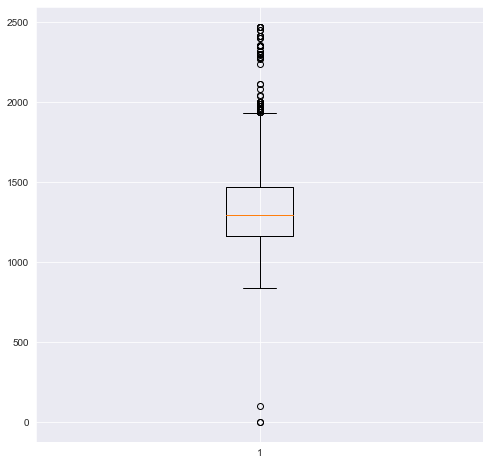

In [148]:
plt.figure(figsize=(8, 8))
plt.boxplot(df.weight)
plt.show()

In [149]:
df.weight.sort_values().tail(20)

14942    2353.0
15226    2353.0
15353    2353.0
15031    2353.0
15213    2353.0
15215    2353.0
11746    2355.0
11073    2400.0
10877    2400.0
15166    2410.0
15129    2410.0
15132    2410.0
15139    2410.0
10634    2450.0
10642    2450.0
15674    2471.0
15181    2471.0
14971    2471.0
15276    2471.0
15227    2471.0
Name: weight, dtype: float64

In [151]:
df.weight.sort_values().head(50)

8354        1.0
12775       1.0
1143      102.0
8853      840.0
14309     900.0
13551     977.0
13509     977.0
13933     980.0
14154     980.0
14229     980.0
13931     980.0
14650     980.0
13728     980.0
14475     980.0
13605     980.0
13992     980.0
13995     980.0
14101     980.0
13537    1009.0
874      1010.0
842      1010.0
1203     1010.0
1425     1010.0
14112    1017.0
13893    1030.0
2596     1035.0
1873     1035.0
1713     1035.0
1256     1035.0
814      1035.0
1869     1035.0
1365     1035.0
1872     1035.0
1549     1035.0
1199     1035.0
1255     1035.0
134      1040.0
2533     1040.0
2670     1041.0
8291     1041.0
8396     1041.0
13880    1052.0
14478    1052.0
14245    1052.0
14152    1052.0
13884    1052.0
13887    1052.0
13890    1052.0
13827    1052.0
14819    1052.0
Name: weight, dtype: float64

In [155]:
df.weight[df.weight.isin([1,102])]=np.nan

In [156]:
groupwith2(df,"make_model","body_type","weight")

In [157]:
null_check("weight")

Column name : weight
----------------------------------------
Number of nulls : 0
Percent of nulls : % 0.0
Value_counts :
1163.0    1582
1360.0    1419
1487.0     967
1135.0     837
1425.0     744
1180.0     695
1273.0     656
1165.0     603
1503.0     561
1734.0     556
1087.0     291
1335.0     242
1365.0     211
1199.0     205
1350.0     156
1119.0     153
1355.0     136
1280.0     127
1260.0     127
1275.0     112
1278.0     110
1255.0     108
1200.0     107
1522.0     103
1659.0     102
1195.0      96
1120.0      93
1403.0      90
1701.0      87
1250.0      85
1685.0      83
1441.0      82
1308.0      80
1285.0      80
1613.0      75
1110.0      75
1279.0      72
1364.0      70
1345.0      67
1733.0      65
1071.0      64
1209.0      64
1325.0      64
1230.0      63
1141.0      63
1845.0      56
1090.0      54
1052.0      53
1154.0      52
1664.0      52
1513.0      51
1065.0      50
1237.0      49
1440.0      46
1205.0      46
1088.0      46
1265.0      45
1395.0      44
1666.0  

## 11- CO2_Emission

In [158]:
null_check("CO2_Emission")

Column name : CO2_Emission
----------------------------------------
Number of nulls : 0
Percent of nulls : % 0.0
Value_counts :
120.0      1000
104.0       782
97.0        631
99.0        593
124.0       574
102.0       501
85.0        456
103.0       445
128.0       424
106.0       418
105.0       401
117.0       394
114.0       390
119.0       381
107.0       378
137.0       376
108.0       362
129.0       356
126.0       353
118.0       270
110.0       266
127.0       257
135.0       252
113.0       237
111.0       237
109.0       234
139.0       224
140.0       218
141.0       214
92.0        198
123.0       189
130.0       180
150.0       174
112.0       171
143.0       171
95.0        161
116.0       157
98.0        156
131.0       150
153.0       149
101.0       146
136.0       145
133.0       145
125.0       133
134.0       130
145.0       126
149.0       117
147.0       109
132.0       100
115.0        86
122.0        84
121.0        82
138.0        75
93.0         66
142.0   

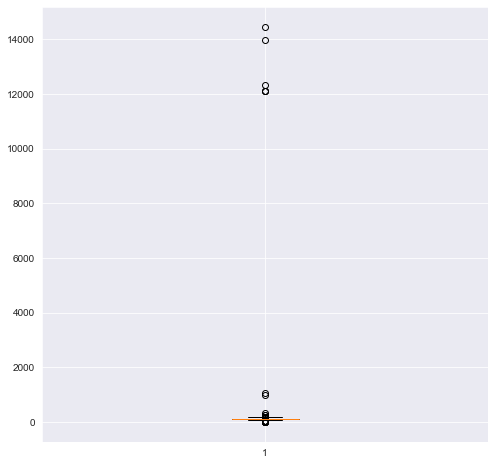

In [159]:
plt.figure(figsize=(8, 8))
plt.boxplot(df.CO2_Emission)
plt.show()

In [162]:
df.CO2_Emission.sort_values().head(35)

8216      0.0
10562     0.0
14898     1.0
6396      5.0
13004     5.0
11549     5.0
8109     14.0
3615     36.0
13393    36.0
3617     36.0
3612     36.0
3356     36.0
12543    45.0
9794     51.0
7856     80.0
8584     82.0
8900     82.0
13664    82.0
14127    82.0
13959    82.0
13438    82.0
13514    82.0
8868     82.0
8870     82.0
13575    82.0
14193    82.0
13712    82.0
13739    82.0
8565     82.0
13857    82.0
13717    82.0
8907     82.0
13736    82.0
8908     82.0
8474     82.0
Name: CO2_Emission, dtype: float64

In [166]:
df[df.CO2_Emission==36]

,make_model,body_type,price,km,prev_owner,hp,Type,Body Color,Paint Type,Displacement,Cylinders,Drive chain,Fuel,Comfort_Convenience,Entertainment_Media,Extras,Gears,age,Inspection_new,Upholstery_Type,Upholstery_color,nr_of_doors,nr_of_seats,Gearing_Type,weight,cons_comb,CO2_Emission
3356,Audi A3,Compact,24950,57000.0,1.0,150.0,Used,Blue,Metallic,1400.0,4.0,front,Electric,"Air conditioning,Armrest,Automatic climate control,Cruise control,Electrical...","Bluetooth,CD player,Digital radio,Hands-free equipment,On-board computer,Rad...","Alloy wheels,Roof rack,Sport package,Sport seats,Sport suspension,Voice Cont...",6.0,3.0,No,Part leather,0.0,5.0,5.0,Semi-automatic,1280.0,4.1,36.0
3612,Audi A3,Sedans,38450,13800.0,1.0,110.0,Used,Black,Metallic,1395.0,4.0,front,Electric,"Air conditioning,Armrest,Automatic climate control,Cruise control,Leather st...","Bluetooth,CD player,Digital radio,Hands-free equipment,MP3,On-board computer...","Alloy wheels,Sport package,Sport seats,Voice Control",6.0,1.0,No,Cloth,0.0,5.0,5.0,Semi-automatic,1615.0,1.6,36.0
3615,Audi A3,Sedans,35899,20880.0,1.0,110.0,Used,White,Metallic,1395.0,4.0,front,Electric,"Air conditioning,Power windows,Seat ventilation,Split rear seats","Bluetooth,Radio",Alloy wheels,6.0,1.0,No,Cloth,0.0,5.0,5.0,Semi-automatic,1615.0,1.6,36.0
3617,Audi A3,Sedans,38000,12000.0,1.0,110.0,Used,Grey,Metallic,1395.0,4.0,front,Electric,"Air conditioning,Armrest,Automatic climate control,Auxiliary heating,Electri...","Bluetooth,CD player,Digital radio,Hands-free equipment,MP3,On-board computer...","Alloy wheels,Shift paddles,Sport package,Sport seats,Touch screen,Voice Control",6.0,1.0,No,Part leather,0.0,5.0,5.0,Semi-automatic,1615.0,1.6,36.0
13393,Renault Clio,Sedans,8490,23863.0,1.0,85.0,Used,White,Metallic,1461.0,4.0,front,Electric,"Air conditioning,Cruise control,Navigation system",On-board computer,Alloy wheels,6.0,3.0,No,Part leather,0.0,5.0,5.0,Automatic,1165.0,5.0,36.0


In [167]:
df[df.CO2_Emission<36]

,make_model,body_type,price,km,prev_owner,hp,Type,Body Color,Paint Type,Displacement,Cylinders,Drive chain,Fuel,Comfort_Convenience,Entertainment_Media,Extras,Gears,age,Inspection_new,Upholstery_Type,Upholstery_color,nr_of_doors,nr_of_seats,Gearing_Type,weight,cons_comb,CO2_Emission
6396,Opel Astra,Sedans,6950,88000.000000,1.0,81.0,Used,Grey,Metallic,1399.0,4.0,front,Diesel,"Air conditioning,Leather steering wheel,Multi-function steering wheel,Naviga...",CD player,Alloy wheels,6.0,0.0,No,Part leather,0.0,5.0,5.0,Manual,1273.0,4.5,5.0
8109,Opel Astra,Station wagon,18380,1020.000000,1.0,77.0,Used,Silver,Metallic,999.0,4.0,front,Benzine,"Air conditioning,Armrest,Automatic climate control,Cruise control,Electrical...","Bluetooth,Digital radio,Hands-free equipment,MP3,On-board computer,Radio",Alloy wheels,5.0,0.0,Yes,Cloth,0.0,5.0,5.0,Manual,1425.0,5.0,14.0
8216,Opel Astra,Sedans,17850,4500.000000,1.0,92.0,Employee's car,Red,Metallic,1399.0,4.0,front,Benzine,"Air conditioning,Armrest,Automatic climate control,Cruise control,Electrical...","Bluetooth,Hands-free equipment,MP3,On-board computer,Radio,USB","Touch screen,Voice Control",6.0,0.0,Yes,Cloth,0.0,5.0,5.0,Manual,1273.0,0.0,0.0
10562,Opel Insignia,Station wagon,16900,59800.000000,1.0,125.0,Used,Black,Metallic,1956.0,4.0,front,Diesel,"Air conditioning,Armrest,Automatic climate control,Cruise control,Electrical...","On-board computer,Radio","Alloy wheels,Touch screen",6.0,2.0,Yes,Part leather,0.0,5.0,5.0,Automatic,1487.0,0.0,0.0
11549,Opel Insignia,Station wagon,18900,34386.000000,1.0,125.0,Used,other,Metallic,1956.0,4.0,front,Diesel,"Air conditioning,Armrest,Automatic climate control,Cruise control,Electrical...","Bluetooth,Hands-free equipment,On-board computer,Radio,USB","Alloy wheels,Roof rack",6.0,1.0,No,Full leather,0.0,5.0,5.0,Manual,1633.0,4.4,5.0
13004,Opel Insignia,Station wagon,24700,9800.000000,1.0,100.0,Used,Blue,Metallic,1598.0,4.0,front,Diesel,"Air conditioning,Armrest,Automatic climate control,Cruise control,Electrical...","Bluetooth,Hands-free equipment,On-board computer,Radio,USB","Alloy wheels,Roof rack",6.0,0.0,No,Part leather,0.0,5.0,5.0,Manual,1503.0,4.2,5.0
14898,Renault Duster,Off-Road,10850,16.987484,0.0,77.0,New,White,Metallic,1598.0,4.0,4WD,Benzine,"Air conditioning,Power windows","On-board computer,Radio",Roof rack,6.0,0.0,No,Cloth,0.0,5.0,5.0,Manual,1163.0,1.0,1.0


In [168]:
df.CO2_Emission[df.CO2_Emission<36]=np.nan

In [169]:
df.CO2_Emission.sort_values().tail(20)

12050      199.0
12525      199.0
10767      239.0
10509      253.0
535        331.0
4556       990.0
4089      1060.0
6578     12087.0
6577     12087.0
5818     12087.0
8541     12324.0
12339    13983.0
11884    14457.0
6396         NaN
8109         NaN
8216         NaN
10562        NaN
11549        NaN
13004        NaN
14898        NaN
Name: CO2_Emission, dtype: float64

In [170]:
df.CO2_Emission[df.CO2_Emission>900]=np.nan

In [171]:
null_check("CO2_Emission")

Column name : CO2_Emission
----------------------------------------
Number of nulls : 15
Percent of nulls : % 0.09
Value_counts :
120.0    1000
104.0     782
97.0      631
99.0      593
124.0     574
102.0     501
85.0      456
103.0     445
128.0     424
106.0     418
105.0     401
117.0     394
114.0     390
119.0     381
107.0     378
137.0     376
108.0     362
129.0     356
126.0     353
118.0     270
110.0     266
127.0     257
135.0     252
113.0     237
111.0     237
109.0     234
139.0     224
140.0     218
141.0     214
92.0      198
123.0     189
130.0     180
150.0     174
143.0     171
112.0     171
95.0      161
116.0     157
98.0      156
131.0     150
153.0     149
101.0     146
136.0     145
133.0     145
125.0     133
134.0     130
145.0     126
149.0     117
147.0     109
132.0     100
115.0      86
122.0      84
121.0      82
138.0      75
93.0       66
168.0      58
142.0      58
100.0      55
148.0      48
94.0       42
144.0      40
154.0      40
146.0      36
90

In [172]:
groupwith2(df,"make_model","Gears","CO2_Emission")

In [173]:
null_check("CO2_Emission")

Column name : CO2_Emission
----------------------------------------
Number of nulls : 0
Percent of nulls : % 0.0
Value_counts :
120.0    1000
104.0     782
97.0      631
99.0      593
124.0     574
102.0     501
85.0      456
103.0     446
128.0     429
106.0     419
105.0     401
117.0     394
114.0     390
119.0     381
137.0     381
107.0     379
108.0     362
129.0     356
126.0     353
118.0     270
110.0     266
127.0     257
135.0     252
113.0     237
111.0     237
109.0     234
139.0     224
140.0     218
141.0     214
92.0      198
123.0     189
130.0     180
150.0     174
143.0     172
112.0     171
95.0      161
116.0     157
98.0      156
131.0     150
153.0     149
101.0     146
133.0     145
136.0     145
125.0     133
134.0     130
145.0     126
149.0     117
147.0     109
132.0     100
115.0      86
122.0      84
121.0      82
138.0      75
93.0       66
142.0      58
168.0      58
100.0      55
148.0      48
94.0       42
144.0      40
154.0      40
146.0      36
90.0

## 4- hp

In [40]:
null_check("hp")

Column name : hp
----------------------------------------
Number of nulls : 0
Percent of nulls : % 0.0
Value_counts :
85.0     2619
66.0     2122
81.0     1403
100.0    1309
110.0    1112
70.0      889
125.0     707
51.0      695
55.0      569
118.0     516
92.0      466
121.0     392
147.0     380
77.0      353
56.0      286
54.0      276
103.0     253
87.0      232
165.0     194
88.0      177
60.0      160
162.0      98
74.0       81
96.0       72
71.0       59
101.0      47
67.0       40
154.0      39
122.0      35
119.0      30
164.0      27
135.0      24
52.0       22
82.0       22
1.0        20
78.0       20
146.0      18
294.0      18
141.0      16
57.0       10
120.0       8
104.0       8
112.0       7
191.0       7
117.0       6
155.0       6
184.0       5
65.0        4
90.0        4
76.0        4
168.0       3
98.0        3
149.0       3
80.0        3
93.0        3
53.0        2
86.0        2
140.0       2
150.0       2
228.0       2
270.0       2
143.0       2
167.0       2


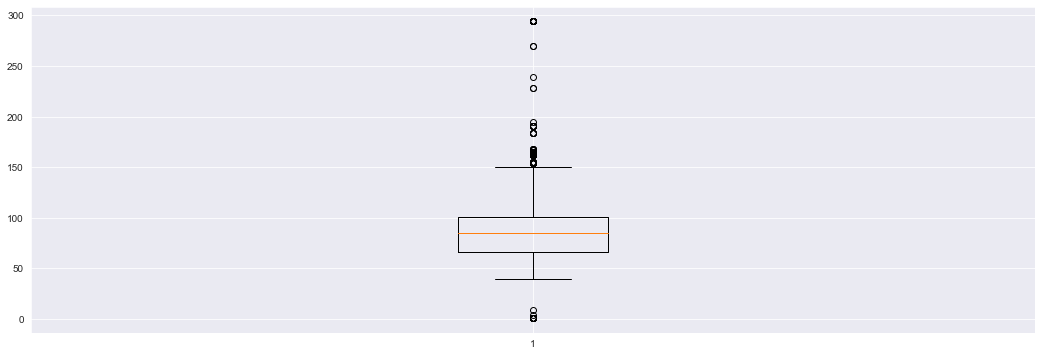

In [42]:
plt.figure(figsize=(18, 6))
plt.boxplot(df.hp)
plt.show()

In [48]:
df.hp.sort_values().tail(10)

3648    294.0
3595    294.0
3596    294.0
3610    294.0
3593    294.0
3592    294.0
3590    294.0
3587    294.0
3649    294.0
3606    294.0
Name: hp, dtype: float64

In [59]:
df.hp.sort_values().head(40)

9283      1.0
10575     1.0
7015      1.0
10576     1.0
10606     1.0
9295      1.0
6005      1.0
6034      1.0
10464     1.0
9288      1.0
9285      1.0
9284      1.0
7017      1.0
7018      1.0
9281      1.0
6945      1.0
15151     1.0
15152     1.0
9286      1.0
7013      1.0
13881     4.0
3913      9.0
8853     40.0
13755    40.0
8407     44.0
10400    51.0
10360    51.0
10361    51.0
10362    51.0
10363    51.0
10414    51.0
10364    51.0
10367    51.0
10368    51.0
10369    51.0
9595     51.0
10371    51.0
10372    51.0
10373    51.0
10366    51.0
Name: hp, dtype: float64

In [60]:
df.hp.loc[df.hp < 39].index

Int64Index([ 3913,  6005,  6034,  6945,  7013,  7015,  7017,  7018,  9281,
             9283,  9284,  9285,  9286,  9288,  9295, 10464, 10575, 10576,
            10606, 13881, 15151, 15152],
           dtype='int64')

In [61]:
df.hp.loc[df.hp < 39]= np.nan

In [63]:
null_check("hp")

Column name : hp
----------------------------------------
Number of nulls : 22
Percent of nulls : % 0.14
Value_counts :
85.0     2619
66.0     2119
81.0     1403
100.0    1308
110.0    1112
70.0      889
125.0     707
51.0      695
55.0      569
118.0     516
92.0      466
121.0     392
147.0     380
77.0      353
56.0      286
54.0      276
103.0     253
87.0      232
165.0     194
88.0      177
60.0      160
162.0      98
74.0       81
96.0       72
71.0       59
101.0      47
67.0       40
154.0      39
122.0      35
119.0      30
164.0      27
135.0      24
NaN        22
82.0       22
52.0       22
78.0       20
294.0      18
146.0      18
141.0      16
57.0       10
104.0       8
120.0       8
112.0       7
191.0       7
117.0       6
155.0       6
184.0       5
76.0        4
90.0        4
65.0        4
168.0       3
98.0        3
149.0       3
80.0        3
93.0        3
143.0       2
86.0        2
140.0       2
150.0       2
228.0       2
270.0       2
53.0        2
63.0        

In [64]:
groupwith2(df,"body_type", "make_model", "hp")

In [65]:
null_check("hp")

Column name : hp
----------------------------------------
Number of nulls : 0
Percent of nulls : % 0.0
Value_counts :
85.0     2620
66.0     2119
81.0     1403
100.0    1311
110.0    1116
70.0      889
125.0     711
51.0      702
55.0      569
118.0     518
92.0      466
121.0     392
147.0     380
77.0      353
56.0      287
54.0      276
103.0     253
87.0      232
165.0     194
88.0      177
60.0      160
162.0      98
74.0       81
96.0       72
71.0       59
101.0      47
67.0       40
154.0      39
122.0      35
119.0      30
164.0      27
135.0      24
52.0       22
82.0       22
78.0       20
294.0      18
146.0      18
141.0      16
57.0       10
120.0       8
104.0       8
112.0       7
191.0       7
155.0       6
117.0       6
184.0       5
65.0        4
76.0        4
90.0        4
98.0        3
168.0       3
149.0       3
80.0        3
93.0        3
143.0       2
86.0        2
140.0       2
150.0       2
228.0       2
270.0       2
53.0        2
63.0        2
40.0        2


## 12- Consumption

In [174]:
null_check(["cons_comb"])

Column name : ['cons_comb']
----------------------------------------
Number of nulls : cons_comb    0
dtype: int64
Percent of nulls : % cons_comb    0.0
dtype: float64
Value_counts :
cons_comb
4.00         1012
5.60          961
5.40          899
5.00          805
4.70          765
3.90          733
4.50          731
4.40          667
5.10          657
3.80          584
4.20          574
4.80          546
4.90          534
5.30          530
5.20          454
4.60          425
5.50          388
3.70          369
5.90          369
4.10          362
5.70          342
6.00          331
3.30          307
4.30          307
3.50          288
3.60          231
6.20          219
6.30          181
6.10          175
5.80          165
6.60          148
6.80          136
3.40          125
6.40           75
3.00           69
7.40           66
6.70           43
6.50           43
7.10           38
10.00          35
6.90           27
3.20           25
3.65           20
8.30           20
3.45           

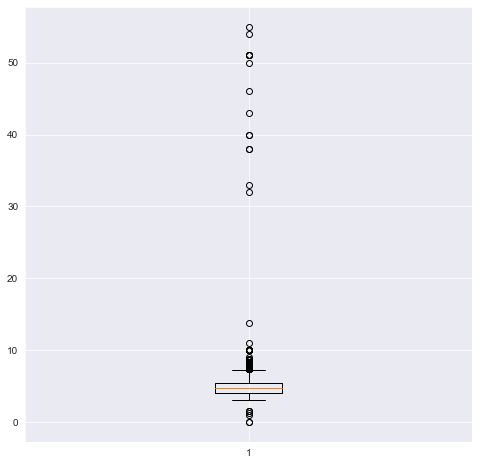

In [175]:
plt.figure(figsize=(8, 8))
plt.boxplot(df.cons_comb);

In [183]:
df.cons_comb.sort_values().value_counts()

4.00     1012
5.60      961
5.40      899
5.00      805
4.70      765
3.90      733
4.50      731
4.40      667
5.10      657
3.80      584
4.20      574
4.80      546
4.90      534
5.30      530
5.20      454
4.60      425
5.50      388
3.70      369
5.90      369
4.10      362
5.70      342
6.00      331
3.30      307
4.30      307
3.50      288
3.60      231
6.20      219
6.30      181
6.10      175
5.80      165
6.60      148
6.80      136
3.40      125
6.40       75
3.00       69
7.40       66
6.70       43
6.50       43
7.10       38
10.00      35
6.90       27
3.20       25
3.65       20
8.30       20
3.45       19
5.15       19
7.60       14
7.00       10
3.10        7
7.20        6
7.80        6
8.00        5
51.00       4
8.60        4
1.60        3
8.70        3
3.95        3
7.90        3
40.00       2
38.00       2
8.10        2
0.00        2
5.45        2
7.30        2
4.55        2
7.50        1
4.30        1
54.00       1
1.20        1
50.00       1
46.00       1
43.00 

In [187]:
df[(df.cons_comb<3) & (df.Fuel!="Electric")]

,make_model,body_type,price,km,prev_owner,hp,Type,Body Color,Paint Type,Displacement,Cylinders,Drive chain,Fuel,Comfort_Convenience,Entertainment_Media,Extras,Gears,age,Inspection_new,Upholstery_Type,Upholstery_color,nr_of_doors,nr_of_seats,Gearing_Type,weight,cons_comb,CO2_Emission
8216,Opel Astra,Sedans,17850,4500.000000,1.0,92.0,Employee's car,Red,Metallic,1399.0,4.0,front,Benzine,"Air conditioning,Armrest,Automatic climate control,Cruise control,Electrical...","Bluetooth,Hands-free equipment,MP3,On-board computer,Radio,USB","Touch screen,Voice Control",6.0,0.0,Yes,Cloth,0.0,5.0,5.0,Manual,1273.0,0.0,128.0
10562,Opel Insignia,Station wagon,16900,59800.000000,1.0,125.0,Used,Black,Metallic,1956.0,4.0,front,Diesel,"Air conditioning,Armrest,Automatic climate control,Cruise control,Electrical...","On-board computer,Radio","Alloy wheels,Touch screen",6.0,2.0,Yes,Part leather,0.0,5.0,5.0,Automatic,1487.0,0.0,137.0
13674,Renault Clio,Off-Road,7700,95000.000000,1.0,55.0,Used,White,Metallic,1461.0,4.0,front,Diesel,"Air conditioning,Cruise control,Electrical side mirrors,Heads-up display,Hil...","Bluetooth,CD player,Digital radio,Hands-free equipment,MP3,On-board computer...","Catalytic Converter,Sport package,Sport seats,Voice Control",5.0,3.0,No,Cloth,0.0,5.0,5.0,Manual,1162.0,1.2,125.0
14898,Renault Duster,Off-Road,10850,16.987484,0.0,77.0,New,White,Metallic,1598.0,4.0,4WD,Benzine,"Air conditioning,Power windows","On-board computer,Radio",Roof rack,6.0,0.0,No,Cloth,0.0,5.0,5.0,Manual,1163.0,1.0,186.0


In [189]:
df.cons_comb[(df.cons_comb<3) & (df.Fuel!="Electric")]=np.nan

In [193]:
df.cons_comb[(df.cons_comb>=10)]=np.nan

In [194]:
groupwith2(df,"make_model","Gears","cons_comb")

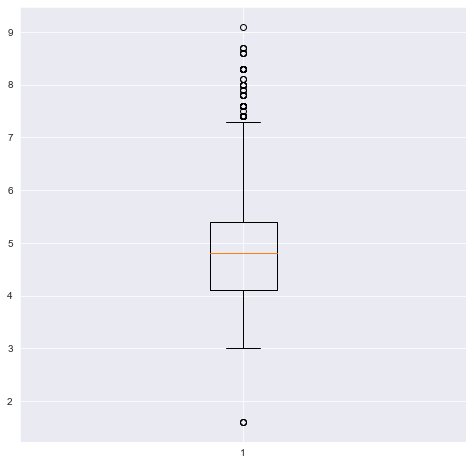

In [197]:
plt.figure(figsize=(8, 8))
plt.boxplot(df.cons_comb);

In [195]:
null_check("cons_comb")

Column name : cons_comb
----------------------------------------
Number of nulls : 0
Percent of nulls : % 0.0
Value_counts :
4.00    1048
5.60     964
5.40     900
5.00     810
4.70     766
3.90     736
4.50     732
4.40     667
5.10     657
3.80     584
4.20     580
4.80     546
4.90     534
5.30     530
5.20     454
4.60     425
5.50     388
5.90     369
3.70     369
4.10     362
5.70     342
6.00     331
3.30     307
4.30     307
3.50     288
3.60     231
6.20     219
6.30     181
6.10     175
5.80     165
6.60     148
6.80     136
3.40     125
6.40      75
3.00      69
7.40      66
6.50      43
6.70      43
7.10      38
6.90      27
3.20      25
8.30      20
3.65      20
3.45      19
5.15      19
7.60      14
7.00      10
3.10       7
7.20       6
7.80       6
8.00       5
8.60       4
7.90       3
8.70       3
1.60       3
3.95       3
7.30       2
5.45       2
8.10       2
4.55       2
9.10       1
4.30       1
7.50       1
Name: cons_comb, dtype: int64


In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   price                15915 non-null  int64  
 3   km                   15915 non-null  float64
 4   prev_owner           15915 non-null  float64
 5   hp                   15915 non-null  float64
 6   Type                 15915 non-null  object 
 7   Body Color           15915 non-null  object 
 8   Paint Type           15915 non-null  object 
 9   Displacement         15915 non-null  float64
 10  Cylinders            15915 non-null  float64
 11  Drive chain          15915 non-null  object 
 12  Fuel                 15915 non-null  object 
 13  Comfort_Convenience  15915 non-null  object 
 14  Entertainment_Media  15915 non-null  object 
 15  Extras               15915 non-null 

## Others

In [199]:
#'comfort_convenience', 'entertainment_media', 'extras'

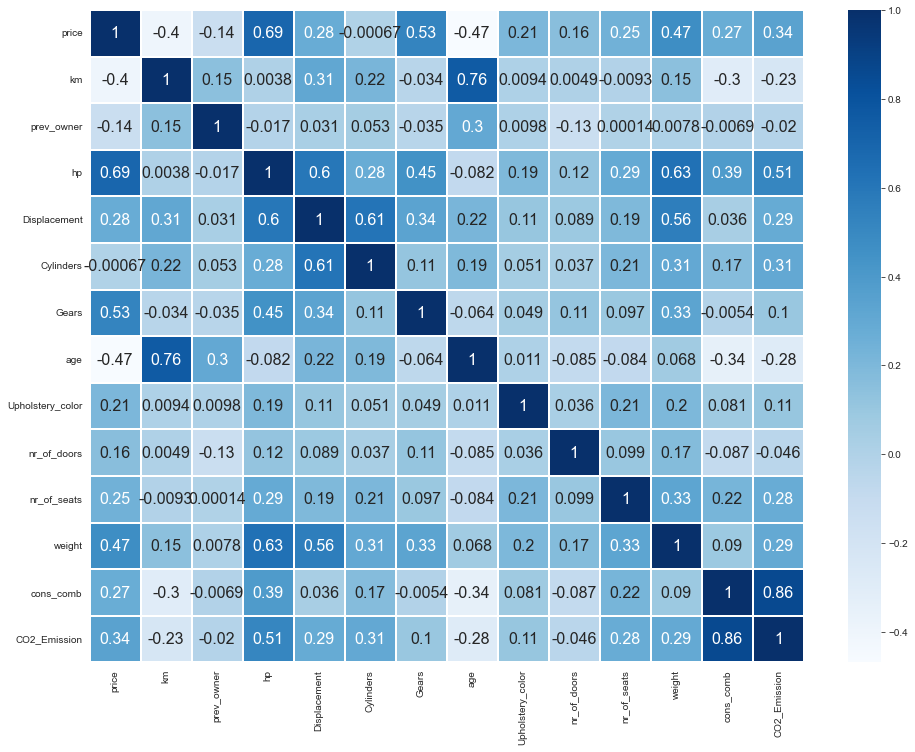

In [198]:
plt.figure(figsize=(16, 12))
df_num = df.select_dtypes("number")
sns.heatmap(df_num.corr(), annot=True, cmap="Blues", linewidths=0.2, annot_kws={"size": 16});

In [461]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15919 non-null  object 
 1   body_type            15919 non-null  object 
 2   price                15919 non-null  int64  
 3   km                   15919 non-null  float64
 4   prev_owner           15919 non-null  float64
 5   hp                   15919 non-null  float64
 6   Type                 15919 non-null  object 
 7   Body Color           15919 non-null  object 
 8   Paint Type           15919 non-null  object 
 9   Displacement         15919 non-null  float64
 10  Cylinders            15919 non-null  float64
 11  Drive chain          15919 non-null  object 
 12  Fuel                 15919 non-null  object 
 13  Comfort_Convenience  15919 non-null  object 
 14  Entertainment_Media  15919 non-null  object 
 15  Extras               15919 non-null 

In [212]:
df.shape

(15915, 27)

In [210]:
df.columns

Index(['make_model', 'body_type', 'price', 'km', 'prev_owner', 'hp', 'Type',
       'Body Color', 'Paint Type', 'Displacement', 'Cylinders', 'Drive chain',
       'Fuel', 'Comfort_Convenience', 'Entertainment_Media', 'Extras', 'Gears',
       'age', 'Inspection_new', 'Upholstery_Type', 'Upholstery_color',
       'nr_of_doors', 'nr_of_seats', 'Gearing_Type', 'weight', 'cons_comb',
       'CO2_Emission'],
      dtype='object')

In [200]:
#df.to_csv("myfinal_scout_not_dummy.csv", index=False)

In [211]:
df=pd.read_csv('myfinal_scout_not_dummy.csv')

In [213]:
df = df.join(df["Comfort_Convenience"].str.get_dummies(sep=",").add_prefix("cc_"))
df = df.join(df["Entertainment_Media"].str.get_dummies(sep=",").add_prefix("em_"))
df = df.join(df["Extras"].str.get_dummies(sep = ",").add_prefix("ex_"))

In [215]:
df.shape

(15915, 92)

In [217]:
df.drop(["Comfort_Convenience", "Entertainment_Media", "Extras"], axis=1, inplace=True)

In [218]:
df.shape

(15915, 89)

In [219]:
Final=pd.get_dummies(df, drop_first=True)

In [221]:
Final.shape

(15915, 125)

In [222]:
Final.head().T

,0,1,2,3,4
price,15770.0,14500.0,14640.0,14500.0,16790.0
km,56013.0,80000.0,83450.0,73000.0,16200.0
prev_owner,2.0,1.0,1.0,1.0,1.0
hp,66.0,141.0,85.0,66.0,66.0
Displacement,1422.0,1798.0,1598.0,1422.0,1422.0
Cylinders,3.0,4.0,4.0,3.0,3.0
Gears,7.0,7.0,7.0,6.0,7.0
age,3.0,2.0,3.0,3.0,3.0
Upholstery_color,0.0,0.0,0.0,0.0,0.0
nr_of_doors,5.0,3.0,4.0,3.0,5.0


In [ ]:
Final.to_csv("AutoScoutFİNAL_dummy.csv", index=False)